In [1]:
from torchvision import models
import torchvision.transforms as T
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import cv2 as cv

In [2]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


2021-03-23 17:18:07 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


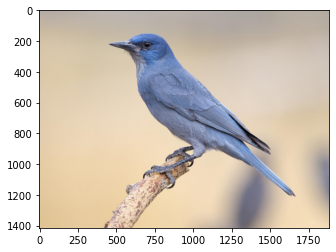

In [3]:
!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img); plt.show()

In [5]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
      idx = image == l
      r[idx] = label_colors[l, 0]
      g[idx] = label_colors[l, 1]
      b[idx] = label_colors[l, 2]   
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [12]:
def segment(net, path, show_orig=True, dev='cuda'):
  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(640), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  print(f"Image size: {np.array(img).shape}")
  print(f"Mask size: {rgb.shape}")
  plt.imshow(rgb); plt.axis('off'); plt.show()

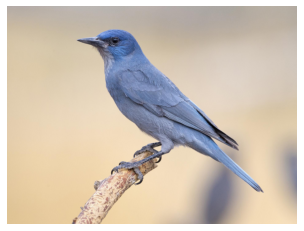

Image size: (1414, 1885, 3)
Mask size: (640, 853, 3)


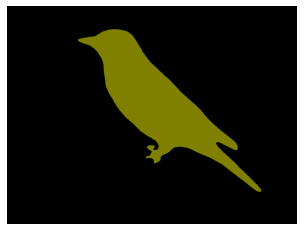

In [13]:
segment(dlab, './bird.png')

In [14]:
!wget -nv https://s23527.pcdn.co/wp-content/uploads/2018/01/After-DIY-Webcam-Beauty-Dish-745x419.jpg.optimal.jpg -O selfie.png

2021-03-23 17:19:56 URL:https://s23527.pcdn.co/wp-content/uploads/2018/01/After-DIY-Webcam-Beauty-Dish-745x419.jpg.optimal.jpg [37135/37135] -> "selfie.png" [1]


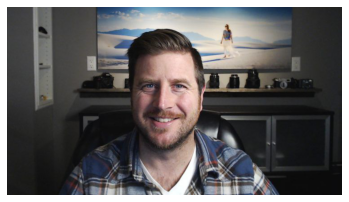

Image size: (419, 745, 3)
Mask size: (640, 1137, 3)


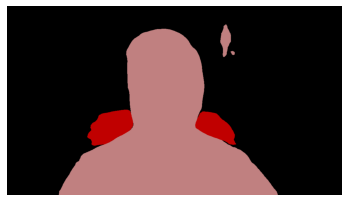

In [15]:
segment(dlab, './selfie.png')

In [16]:
!wget -nv https://www.dummies.com/wp-content/uploads/484519.image1.jpg -O selfie.png

2021-03-23 17:20:00 URL:https://www.dummies.com/wp-content/uploads/484519.image1.jpg [31802/31802] -> "selfie.png" [1]


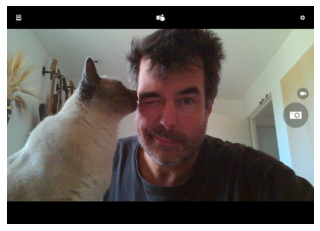

Image size: (380, 535, 3)
Mask size: (640, 901, 3)


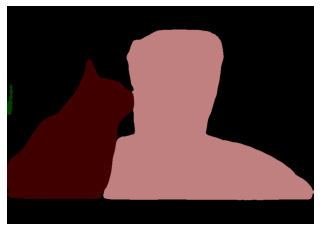

In [18]:
segment(dlab, './selfie.png')